In [10]:
import rarfile
file_path = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented).rar'
def extract_rar(file_path, extract_path):
    with rarfile.RarFile(file_path, 'r') as rar:
        rar.extractall(extract_path)
        print(f"Successfully extracted {file_path} to {extract_path}")

# Replace 'your_file.rar' with the path to your RAR file
# Replace 'your_extraction_path' with the path where you want to extract the contents'
extract_path = '/content'
extract_rar(file_path, extract_path)


Successfully extracted /content/drive/MyDrive/New Plant Diseases Dataset(Augmented).rar to /content


In [2]:
import pandas as pd
import torch
import torchvision
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Resize((32,32))
    ]
)

In [4]:
from torchvision.datasets import ImageFolder


In [11]:
train_data = ImageFolder(root='/content/train',transform=transform)
valid_data = ImageFolder(root='/content/valid',transform=transform)

In [12]:
train_data

Dataset ImageFolder
    Number of datapoints: 70295
    Root location: /content/train
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
           )

In [13]:
train_data.class_to_idx

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [45]:
train_loader = DataLoader(dataset=train_data,shuffle=True,batch_size = 32)
test_loader = DataLoader(dataset=valid_data,shuffle=True,batch_size = 32)

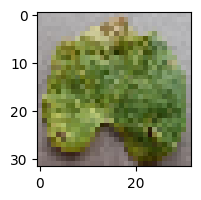

In [20]:
plt.figure(figsize=(2,2))
plt.imshow(next(iter(train_loader))[0][0].permute((1,2,0)))

In [22]:
import os
healthy = []
disease = []
for i in os.listdir('/content/train'):
  lis = i.split("___")
  if lis[1] == "healthy":
    healthy.append(lis[0])
  else:
    disease.append(lis[0])

In [25]:
len(healthy),len(disease)

(12, 26)

In [26]:
train_path = '/content/train'
count = {}
for d in os.listdir(train_path):
  count[d] = len(os.listdir(train_path+'/'+d))

In [27]:
count

{'Tomato___Leaf_Mold': 1882,
 'Apple___Cedar_apple_rust': 1760,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1722,
 'Tomato___Early_blight': 1920,
 'Strawberry___Leaf_scorch': 1774,
 'Tomato___Late_blight': 1851,
 'Pepper,_bell___healthy': 1988,
 'Tomato___Bacterial_spot': 1702,
 'Orange___Haunglongbing_(Citrus_greening)': 2010,
 'Tomato___Spider_mites Two-spotted_spider_mite': 1741,
 'Apple___Apple_scab': 2016,
 'Tomato___healthy': 1926,
 'Tomato___Tomato_mosaic_virus': 1790,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 1642,
 'Potato___Late_blight': 1939,
 'Raspberry___healthy': 1781,
 'Grape___Esca_(Black_Measles)': 1920,
 'Strawberry___healthy': 1824,
 'Grape___healthy': 1692,
 'Cherry_(including_sour)___healthy': 1826,
 'Tomato___Target_Spot': 1827,
 'Peach___Bacterial_spot': 1838,
 'Pepper,_bell___Bacterial_spot': 1913,
 'Blueberry___healthy': 1816,
 'Peach___healthy': 1728,
 'Tomato___Septoria_leaf_spot': 1745,
 'Squash___Powdery_mildew': 1736,
 'Corn_(maize)___Commo

In [34]:
count_df = pd.DataFrame(count.values(),index=count.keys(),columns=['numbers'])

In [35]:
count_df

,numbers
Tomato___Leaf_Mold,1882
Apple___Cedar_apple_rust,1760
Grape___Leaf_blight_(Isariopsis_Leaf_Spot),1722
Tomato___Early_blight,1920
Strawberry___Leaf_scorch,1774
Tomato___Late_blight,1851
"Pepper,_bell___healthy",1988
Tomato___Bacterial_spot,1702
Orange___Haunglongbing_(Citrus_greening),2010
Tomato___Spider_mites Two-spotted_spider_mite,1741


from matplotlib import pyplot as plt
count_df['numbers'].plot(kind='hist', bins=20, title='numbers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
count_df['numbers'].plot(kind='line', figsize=(8, 4), title='numbers')
plt.gca().spines[['top', 'right']].set_visible(False)

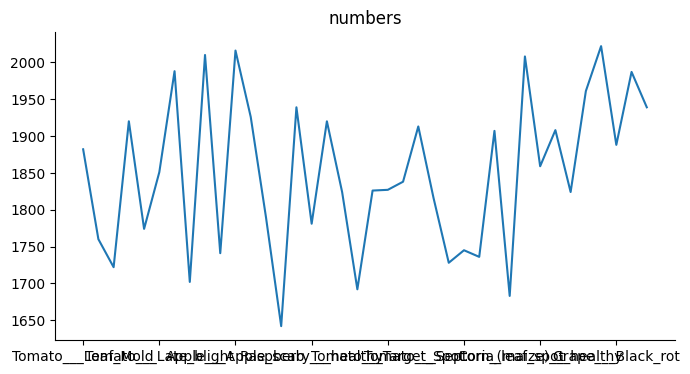

In [37]:
from matplotlib import pyplot as plt
count_df['numbers'].plot(kind='line', figsize=(8, 4), title='numbers')
plt.gca().spines[['top', 'right']].set_visible(False)

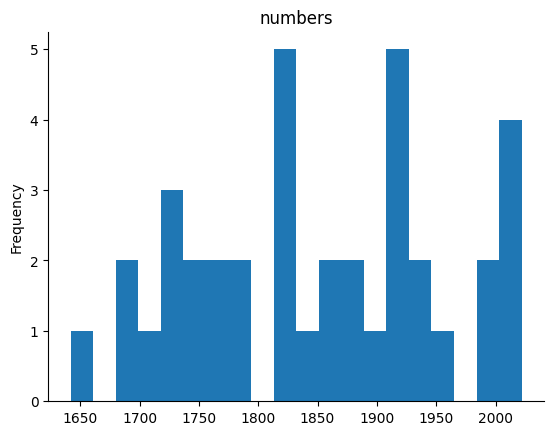

In [36]:
from matplotlib import pyplot as plt
count_df['numbers'].plot(kind='hist', bins=20, title='numbers')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [38]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [39]:
device

'cuda'

In [41]:
from torch import nn
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(
            in_channels=3,
            out_channels=128,
            kernel_size=3,
            stride=1,
            padding=1
            ),
        nn.LeakyReLU(inplace=True),
        nn.BatchNorm2d(num_features=128),
        nn.MaxPool2d(kernel_size=2)

    )
    self.block2 = nn.Sequential(
        nn.Conv2d(
            in_channels=128,
            out_channels=256,
            kernel_size=3,
            stride=1,
            padding=1
            ),
        nn.LeakyReLU(inplace=True),
        nn.BatchNorm2d(num_features=256),
        nn.MaxPool2d(kernel_size=2)

    )
    self.block3 = nn.Sequential(
        nn.Conv2d(
            in_channels=256,
            out_channels=512,
            kernel_size=3,
            stride=1,
            padding=1
            ),
        nn.LeakyReLU(inplace=True),
        nn.BatchNorm2d(num_features=512),
        nn.MaxPool2d(kernel_size=2)

    )
    self.classify = nn.Sequential(
        nn.Dropout(0.2),
        nn.Flatten(),
        nn.Linear(
            in_features=4*4*512,
            out_features=512
                  ),
        nn.LeakyReLU(inplace=True),
        nn.Linear(
            in_features=512,
            out_features=38
                  )

    )
  def forward(self,x):
    x1 = self.block1(x)
    x2 = self.block2(x1)
    x3 = self.block3(x2)
    x4 = self.classify(x3)
    return x4

In [47]:
model = CNN().to(device)

In [48]:
model.cuda()

CNN(
  (block1): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  

In [52]:
from sklearn.metrics import accuracy_score
loss = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(),lr=0.0003)
epochs = 20
for i in range(epochs):
  for batch, (feature,target) in enumerate(train_loader):
    feature = feature.to(device)
    target = target.to(device)
    model.train()
    y_pred = model(feature)
    loss_fn = loss(y_pred.squeeze(),target)
    optim.zero_grad()
    loss_fn.backward()
    optim.step()
  model.eval()

  all_pred = []
  all_target = []

  with torch.inference_mode():
      for feature_,target_ in test_loader:
        feature_ = feature_.to(device)
        target_ = target_.to(device)

        pred_val = model(feature_)
        loss_val = loss(pred_val.squeeze(),target_)
        all_pred.extend(torch.argmax(torch.softmax(pred_val,dim=1),dim=1).cpu().numpy())
        all_target.extend(target_.cpu().numpy())
  accuracy = accuracy_score(all_pred,all_target)
  print(f"epoch : {i} | Training Loss : {loss_fn.item()} | Validation Loss : {loss_val.item()} | accuracy : {accuracy}")

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 0 | Training Loss : 0.07374940067529678 | Validation Loss : 6.615303573198617e-05 | accuracy : 0.954643751422718


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 1 | Training Loss : 0.30735304951667786 | Validation Loss : 0.0015934857074171305 | accuracy : 0.9524812201229228


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 2 | Training Loss : 0.01232276763767004 | Validation Loss : 0.04633340984582901 | accuracy : 0.9604484407011155


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 3 | Training Loss : 0.006985581945627928 | Validation Loss : 0.9440253973007202 | accuracy : 0.8536307762349192


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 4 | Training Loss : 0.010362604632973671 | Validation Loss : 0.8825926780700684 | accuracy : 0.9556111996357842


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 5 | Training Loss : 0.007331724278628826 | Validation Loss : 0.00022842051112093031 | accuracy : 0.9688140223082177


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 6 | Training Loss : 0.0004794092383235693 | Validation Loss : 1.4901158351676713e-07 | accuracy : 0.9651149556111996


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 7 | Training Loss : 9.056486305780709e-05 | Validation Loss : 5.721981779061025e-06 | accuracy : 0.9598793535169587


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 8 | Training Loss : 4.296554379834561e-06 | Validation Loss : 3.755066700250609e-06 | accuracy : 0.9667083997268382


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 9 | Training Loss : 9.813327778829262e-05 | Validation Loss : 0.0 | accuracy : 0.9576030047803323


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 10 | Training Loss : 0.0003810582566075027 | Validation Loss : 1.5795180843269918e-06 | accuracy : 0.9641475073981334


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 11 | Training Loss : 0.09840124845504761 | Validation Loss : 1.7881329767988063e-06 | accuracy : 0.9653425904848623


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 12 | Training Loss : 0.04500708729028702 | Validation Loss : 2.9802320611338473e-08 | accuracy : 0.9667653084452538


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 13 | Training Loss : 4.856481609749608e-05 | Validation Loss : 1.1920927533992653e-07 | accuracy : 0.971261097200091


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 14 | Training Loss : 6.188126462802757e-06 | Validation Loss : 0.0 | accuracy : 0.9602208058274527


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 15 | Training Loss : 0.0005286482628434896 | Validation Loss : 5.90910276514478e-05 | accuracy : 0.9650011381743683


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 16 | Training Loss : 4.2630581447156146e-05 | Validation Loss : 3.999084234237671 | accuracy : 0.9656840427953562


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 17 | Training Loss : 4.810430255020037e-05 | Validation Loss : 2.9802320611338473e-08 | accuracy : 0.9680173002503983


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 18 | Training Loss : 0.17808061838150024 | Validation Loss : 1.3708692677028012e-05 | accuracy : 0.9748463464602777


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


epoch : 19 | Training Loss : 0.3201000988483429 | Validation Loss : 4.465081691741943 | accuracy : 0.9633507853403142
